In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/python_learning_exam_performance.csv')
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


Предобработка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

In [ ]:
# замена N/A значений
df.isna().sum()

,0
student_id,0
age,0
country,0
prior_programming_experience,1062
weeks_in_course,0
hours_spent_learning_per_week,0
practice_problems_solved,0
projects_completed,0
tutorial_videos_watched,0
uses_kaggle,0


In [ ]:
df['prior_programming_experience'].value_counts()
# в датасете нет других пропусков. Здесь под N/A подразумевается отсутствие опыта, а не отсутствие данных
# принято решение замениить пропуски на новую переменную, означающую полное отсутствие опыта

,count
prior_programming_experience,
Beginner,1034
Intermediate,634
Advanced,270


In [ ]:
df['prior_programming_experience'] = df['prior_programming_experience'].fillna(value='None')
df['prior_programming_experience'].value_counts()

,count
prior_programming_experience,
None,1062
Beginner,1034
Intermediate,634
Advanced,270


In [ ]:
df.isna().sum()

,0
student_id,0
age,0
country,0
prior_programming_experience,0
weeks_in_course,0
hours_spent_learning_per_week,0
practice_problems_solved,0
projects_completed,0
tutorial_videos_watched,0
uses_kaggle,0


In [ ]:
# проверка на дубликаты
df.duplicated().sum()

np.int64(0)

In [ ]:
# перевод уникальной id колонки в индекс
df['student_id'].is_unique

True

In [ ]:
df = df.set_index('student_id')

In [ ]:
# смотрим данные
df.describe()

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,0.400667,0.498333,4.973333,5.566000,43.318267,0.177333
std,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,0.490115,0.500081,2.236729,2.885207,17.376666,0.382014
min,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,0.000000,0.000000,3.000000,3.000000,30.900000,0.000000
50%,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,0.000000,0.000000,5.000000,6.000000,43.100000,0.000000
75%,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,1.000000,1.000000,6.000000,8.000000,55.600000,0.000000
max,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,1.000000,1.000000,17.000000,10.000000,100.000000,1.000000


In [ ]:
np.corrcoef(df.final_exam_score, df.passed_exam)
# будем классифицировать passed_exam, коррелирующий с final score

array([[1.        , 0.68661067],
       [0.68661067, 1.        ]])

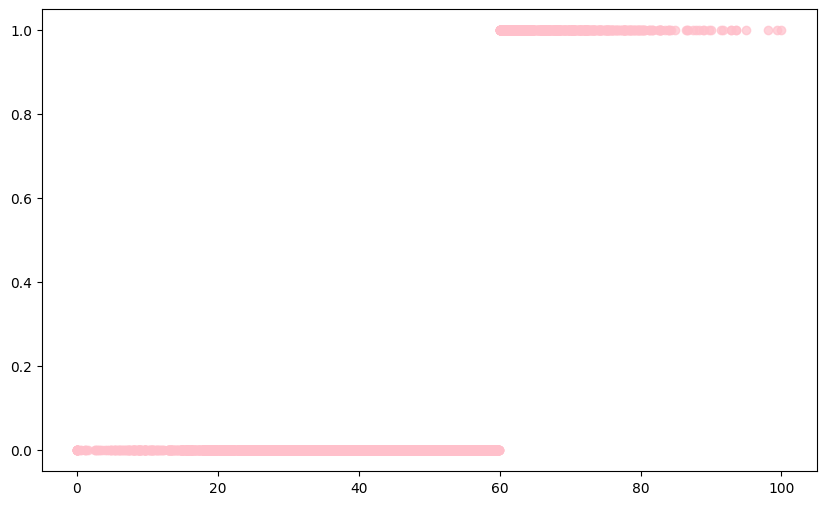

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df.final_exam_score, df.passed_exam, alpha=0.7, color='pink')
plt.show()

In [ ]:
# 'passed_exam' зависит от 'final_exam_score'. 
# Для задачи классификации берём passed_exam за таргет и удаляем final score
df = df.drop('final_exam_score', axis=1)

In [ ]:
# сохраняем данные для дальнейшей работы с ними без повторений шагов выше
df.to_csv('pytyon_exam_preprosessed.csv')

Гистограмма баланса классов.

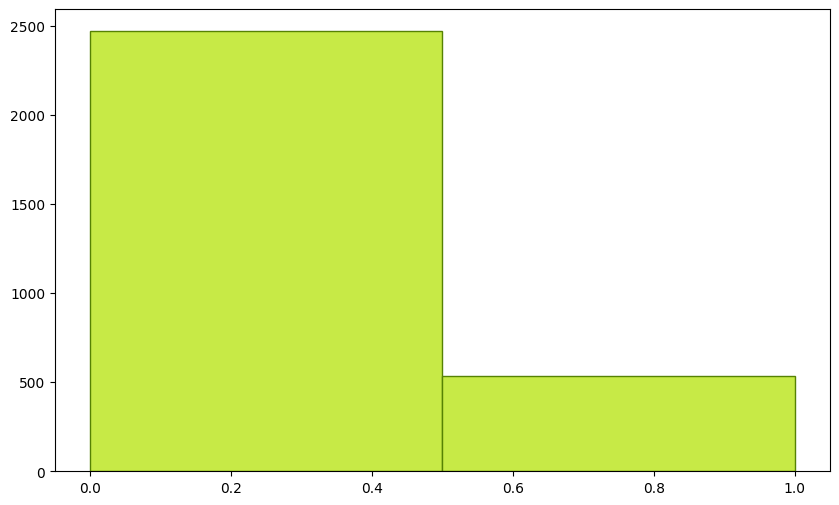

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.hist(df.passed_exam, bins=2, color='#c7ea46', edgecolor='#568203')
plt.show()

Разбой выборки на тренировочную и тестовую.

In [ ]:
Y = df['passed_exam']
X = df.drop(['passed_exam'], axis=1)

In [ ]:
# закодируем категориальные и сделаем скейлер
categorical = X.describe(include='object').columns
numerical = X.describe().columns

In [ ]:
from sklearn.preprocessing import TargetEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ('encoder', TargetEncoder(), categorical),
    ('scaler', MinMaxScaler(), numerical)], remainder='passthrough')
transformer.set_output(transform="pandas")
X_scaled = transformer.fit_transform(X, Y)

In [ ]:
X_scaled.describe()

,encoder__country,encoder__prior_programming_experience,scaler__age,scaler__weeks_in_course,scaler__hours_spent_learning_per_week,scaler__practice_problems_solved,scaler__projects_completed,scaler__tutorial_videos_watched,scaler__uses_kaggle,scaler__participates_in_discussion_forums,scaler__debugging_sessions_per_week,scaler__self_reported_confidence_python
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.177764,0.177049,0.508605,0.508643,0.411419,0.480455,0.222370,0.474924,0.400667,0.498333,0.292549,0.507333
std,0.032035,0.189611,0.297426,0.305358,0.171704,0.148328,0.155078,0.142347,0.490115,0.500081,0.131572,0.320579
min,0.113999,0.004752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151053,0.007170,0.263158,0.285714,0.292398,0.384615,0.111111,0.363636,0.000000,0.000000,0.176471,0.222222
50%,0.183309,0.127911,0.526316,0.500000,0.409357,0.480769,0.222222,0.477273,0.000000,0.000000,0.294118,0.555556
75%,0.201535,0.351242,0.763158,0.785714,0.526316,0.576923,0.333333,0.568182,1.000000,1.000000,0.352941,0.777778
max,0.235896,0.649144,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size = 0.8)

Применение разных алгоримтмов классификации (логистическая регрессия, SVM,
KNN). Построение матрицы ошибок по результатам работы моделей

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# логистическая регрессия

model = LogisticRegression().fit(X_train, Y_train)
logreg_y = model.predict(X_test)

In [ ]:
import plotly.express as px
plt.rcParams['figure.figsize'] = (10,10)
fig = px.imshow(confusion_matrix(Y_test, logreg_y), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prefiction')

In [ ]:
# SVC
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid') # перебор ядер
params = {'kernel':param_kernel}
grid_model = GridSearchCV(estimator=SVC(), param_grid=params, cv=6)
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
best_svc = grid_model.best_estimator_
best_svc.kernel

'linear'

In [ ]:
svc_y = best_svc.predict(X_test)

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
fig = px.imshow(confusion_matrix(Y_test, svc_y), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prefiction')

In [ ]:
# KNN
n_n = np.arange(3, 10)
params = {'n_neighbors': n_n}

model_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                          param_grid=params, cv=6)
model_grid.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])})

In [ ]:
model_grid.best_estimator_

KNeighborsClassifier(n_neighbors=np.int64(5))

In [ ]:
knn_y = model_grid.predict(X_test)
plt.rcParams['figure.figsize'] = (10,10)
fig = px.imshow(confusion_matrix(Y_test, knn_y), text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prefiction')

Сравнение результатов классификации с помощью метрик

In [ ]:
print(classification_report(Y_test, logreg_y))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       476
           1       0.86      0.58      0.69       124

    accuracy                           0.89       600
   macro avg       0.88      0.78      0.81       600
weighted avg       0.89      0.89      0.89       600



In [ ]:
print(classification_report(Y_test, svc_y))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       476
           1       0.85      0.60      0.70       124

    accuracy                           0.90       600
   macro avg       0.88      0.78      0.82       600
weighted avg       0.89      0.90      0.89       600



In [ ]:
print(classification_report(Y_test, knn_y))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       476
           1       0.77      0.27      0.40       124

    accuracy                           0.83       600
   macro avg       0.80      0.62      0.65       600
weighted avg       0.82      0.83      0.80       600



In [ ]:
# accuracy - svc = 0.90
# percision - logreg, svc
# recall - svc
# f1 - svc

Вывод: для данного набора данных лучший резултьтат показала модель SVC с линейным ядром